# Solving a 1D Poisson equation with the finite element method (P2 elements)

## General problem

In this project we wish to sovle the following 1D Possion equation 

$$ -u''(x) = 2x-1, \hspace{0.4cm} \Omega = [0,1], \hspace{0.3cm} u'(0) = C, \hspace{0.3cm} u(1) = D, \tag{1}$$

where $C$ and $D$ are two scalar constants. We will use an uniform mesh consisting of $N_e$ elements, with P2 elements. This means that each element will contain 3 nodes, one local node and two global. The global nodes for each element will be shared among the elements. The steplenght $h$ and mesh points $x_i$ are defined as

$$h = \frac{1}{2N_e}, \qquad x_i = ih \hspace{0.3cm} \text{for } i=0,...,N_n-1$$

where $N_n$ as the total number of nodes (both local and global nodes) and thus $N_n = (2N_e + 1)$. We denote the number of unknowns that needs to be determined as $N = N_n$.

## Task 1

To derive the variational form of eq. (1) we can start from the general 1D Poisson equation

$$ -u''(x) = f(x). $$


We wish to find a solution $u$ which lies in the vector space

$$V = \text{span}\{\psi_0,...,\psi_N\},$$

meaning that $u$ can be expressed as a linear combination on the form

$$u = \sum_{j=0}^{N} c_j \psi_j,$$

were $c_j$ are unknown coefficients that needs to be determined. In our current problem we have to account for the boundary condition $u(1) = D$ in the expression for $u$, but this is not necessary to include when deriving the variational form. We can rewrite eq. (1) as the abstract differential equation 

$$\mathcal{L}(u) = u''(x) + f(x) = 0. \tag{2}$$

To formulate the variational form of eq. (1) we mulitply eq. (2) with an element from $V$ and integrate: 

$$ \langle u''(x) + f(x), \psi \rangle \hspace{0.5cm} \forall \psi \in V \tag{3}$$

Here the inner product $\langle f(x), g(x) \rangle$ is defined as $\int_{\Omega} f(x)g(x) dx$. Rearranging eq. (3) we get

$$ \langle u''(x), \psi \rangle = - \langle f(x), \psi \rangle. $$

If we integrate the left-hand side by parts we obtain the variational form

$$ \langle u', \psi' \rangle = \langle f, \psi \rangle + u'(1)\psi(1) - C\psi(0). \tag{4}$$

When solving eq. (1) the basis functions are piecewise quadratic polynomials.

#### Specified variational form

In our specific case we know that $u(1) = D$, so the term containing $u'(1)$ in eq. (4) vanishes. The number of unknows is reduced by one, since the coefficient $c_{N_n-1}$ does not need to be determined, i. e. $N = N_n-1$. We have the following expression for $u$:

$$u = B(x) + \sum_{j=0}^{N_n-2} c_j \psi_j,$$

with $B(x) = D\psi_{N_n-1}$ and the basis vectors $\psi_j$ are Lagrange polynomials. The variational form reads

$$ \sum_{j=0}^N \langle (B + c_j \psi_j)', \psi_i' \rangle = \langle 2x-1, \psi_i \rangle - C\psi_i(0) $$

$$ \sum_{j=0}^N \langle \psi_j', \psi_i' \rangle c_j = \langle 2x-1, \psi_i \rangle - C\psi_i(0) - \langle D\psi_{N_n-1}', \psi_i' \rangle \tag{5} $$

Eq. (5) can be rewritten to a matrix equation with

$$ \sum_{j=0}^N A_{ij}c_j = \sum_{j=0}^N \langle \psi_j', \psi_i' \rangle c_j,$$

$$ b_i =  \langle 2x-1, \psi_i \rangle - C\psi_i(0) - \langle D \psi_{N_n-1}', \psi_i' \rangle \tag{6}$$

## Task 2

The piecewise quadratic polynomials are Lagrange polynomials,

$$ \psi_i = \prod_{\substack{j=0\\ j\neq i}}^d \frac{x-x_j}{x_i - x_j}, $$

where $d$ is the number of nodes in element $i$. The entries in the element matrix $A$ is given by the inner product $A_{ij} = \langle \psi_j', \psi_i' \rangle$.

* Rightmost element

    The basis functions in $\Omega^{(N_e-1)}$ are:
    $$\psi_{2N_e-2} = \frac{(x-1 + h)(x-1)}{2h^2}$$
    
    $$\psi_{2N_e-1} = - \frac{(x-1+2h)(x-1)}{h^2} $$
    
    $$\psi_{2N_e} = \frac{(x-1+h)(x-1+2h)}{2h^2} $$
    
    The third basis function $\psi_{2N_e}$ is included to determine the term $\langle D \psi_{N_n-1}', \psi_i \rangle$ in the right-hand side of our matrix equation, since $N_n - 1 = 2N_e$.
    
    Then inner products are calculated with symbolic intergration from Sympy. The code is listed in section "Task 3".

    $$ \langle \psi_{2N_e-2}', \psi_{2N_e-2}' \rangle = \frac{7}{6h}, \qquad \langle \psi_{2N_e-2}', \psi_{2N_e-1}' \rangle = -\frac{4}{3h},$$

    $$ \langle \psi_{2N_e-1}', \psi_{2N_e-2}' \rangle = -\frac{4}{3h}, \qquad \langle \psi_{2N_e-1}', \psi_{2N_e-1}' \rangle = \frac{8}{3h},$$

    The right-hand side, given by eq. (6) is 

    $$b_{2N_e-2} = \langle 2x-1, \psi_{2N_e-2} \rangle - \langle D \psi_{N_n-1}', \psi_{2N_e-2}' \rangle = \frac{h}{3} - \frac{4h^2}{3} - \frac{D}{6h}, $$

    $$b_{2N_e-1} = \langle 2x-1, \psi_{2N_e-1} \rangle - \langle D \psi_{N_n-1}', \psi_{2N_e-1}' \rangle = \frac{4D-8h^3+4h^2}{3h}, $$
    

* Leftmost element

    The basis functions in $\Omega^{(0)}$ are:
    $$\psi_0 = \frac{(x-h)(x-2h)}{2h^2}$$
    
    $$\psi_1 = - \frac{x(x-2h)}{h^2} $$
    
    $$\psi_2 = \frac{x(x-h)}{2h^2} $$
    
    The matrix elements are 


$$ \langle \psi_0', \psi_0' \rangle = \frac{7}{6h}, \qquad \langle \psi_0', \psi_1' \rangle = -\frac{4}{3h}, \qquad \langle \psi_0', \psi_2' \rangle = \frac{1}{6h}.$$
    
$$ \langle \psi_1', \psi_0' \rangle = -\frac{4}{3h}, \qquad \langle \psi_1', \psi_1' \rangle = \frac{8}{3h}, \qquad \langle \psi_1', \psi_2' \rangle = -\frac{4}{3h}.$$
    
$$ \langle \psi_2', \psi_0' \rangle = \frac{1}{6h}, \qquad \langle \psi_2', \psi_1' \rangle = -\frac{4}{3h}, \qquad \langle \psi_2', \psi_2' \rangle = \frac{7}{6h}.$$
    
   The elements in the element vector for the leftmost element are
 
$$b_0 =  \langle 2x-1, \psi_0 \rangle - C\psi_0(0) = -\frac{h}{3} - C$$
    
$$b_1 = \langle 2x-1, \psi_1 \rangle = \frac{4h(2h-1)}{3}, $$
    
$$b_2 = \langle 2x-1, \psi_2 \rangle = \frac{h(h-1)}{3} . $$

* An arbitrary interior element with index $e$

    The basis functions in $\Omega^{(e)}$, with the shared nodes being denoted as $(j\pm1)h$ and the local node as $jh$:

    $$\psi_{j-1} = \frac{(x-jh)(x-jh-h)}{2h^2}$$
    
    $$\psi_{j} = - \frac{(x-jh+h)(x-jh-h)}{h^2} $$
    
    $$\psi_{j+1} = \frac{(x-jh)(x-jh+h)}{2h^2} $$
    
    The matrix elements are listed below.

$$ \langle \psi_{j-1}', \psi_{j-1}' \rangle = \frac{7}{6h}, \qquad \langle \psi_{j-1}', \psi_{j}' \rangle = -\frac{4}{3h}, \qquad \langle \psi_{j-1}', \psi_{j+1}' \rangle = \frac{1}{6h}.$$
    
$$ \langle \psi_{j}', \psi_{j-1}' \rangle = -\frac{4}{3h}, \qquad \langle \psi_{j}', \psi_{j}' \rangle = \frac{8}{3h}, \qquad \langle \psi_{j+1}', \psi_{j+1}' \rangle = -\frac{4}{3h}.$$
    
$$ \langle \psi_{j+1}', \psi_{j-1}' \rangle = \frac{1}{6h}, \qquad \langle \psi_{j+1}', \psi_{j}' \rangle = -\frac{4}{3h}, \qquad \langle \psi_{j+1}', \psi_{j+1}' \rangle = \frac{7}{6h}.$$

   The right-hand side, given by eq. (6) is 
    
$$b_{j-1} =  \langle 2x-1, \psi_{j-1} \rangle  = -\frac{h(2hj-2h-1)}{3}$$
    
$$b_{j} = \langle 2x-1, \psi_{j} \rangle = \frac{4h(2hj-1)}{3}, $$
    
$$b_{j+1} = \langle 2x-1, \psi_{j+1} \rangle = \frac{h(2hj + 2h-1)}{3} . $$



### Assembley for the specific case with $N_e = 3$
In the general case $A \in \mathbb{R}^{2N_e \times 2N_e}$ and $b \in \mathbb{R}^{2N_e}$. 

The assembley procedure for the coefficient matrix $A$ and element vector $b$ is outlined below for the specific case $N_e = 3$, so $A \in \mathbb{R}^{6 \times 6}$ and $b \in \mathbb{R}^6$. The superscripts corresponds with the element the basis functions belong to.


$$
\begin{equation*}
	A =
	\begin{bmatrix}
	\langle \psi_0', \psi_0' \rangle^{(0)}  & \langle \psi_0', \psi_1' \rangle^{(0)}  & \langle \psi_0', \psi_2' \rangle^{(0)}  & 0 & 0 & 0 \\
    \langle \psi_1', \psi_0' \rangle^{(0)}  & \langle \psi_1', \psi_1' \rangle^{(0)}  & \langle \psi_1', \psi_2' \rangle^{(0)}  & 0 & 0 & 0 \\
    \langle \psi_2', \psi_0' \rangle^{(0)}  & \langle \psi_2', \psi_1' \rangle^{(0)}  & \langle \psi_2', \psi_2' \rangle ^{(0)} + \langle \psi_2', \psi_2' \rangle^{(1)} & \langle \psi_2', \psi_3' \rangle^{(1)} & \langle \psi_2', \psi_3' \rangle^{(1)} & 0 \\
	0 & 0 & \langle \psi_3', \psi_2' \rangle^{(1)} & \langle \psi_3', \psi_3' \rangle^{(1)}  & \langle \psi_3', \psi_4' \rangle^{(1)} & 0 \\
	0 & 0 & \langle \psi_4', \psi_2' \rangle^{(1)} & \langle \psi_4', \psi_3' \rangle^{(1)} & \langle \psi_4', \psi_4' \rangle^{(1)} + \langle \psi_4', \psi_4' \rangle^{(2)} & \langle \psi_4', \psi_5' \rangle^{(2)} \\
	0 & 0 & 0  & 0 & \langle \psi_5', \psi_4' \rangle^{(2)} & \langle \psi_5', \psi_5' \rangle^{(2)}
	\end{bmatrix},
\end{equation*}
$$

$$
\begin{equation*}
    b =
    \begin{bmatrix}
    b_0^{(0)} \\
    b_1^{(0)} \\
    b_2^{(0)} + b_2^{(1)} \\
    b_3^{(1)} \\
    b_4^{(1)} + b_4^{(2)} \\
    b_5^{(2)}
    \end{bmatrix}
    =
	\begin{bmatrix}
     \langle 2x-1, \psi_0 \rangle - C\psi_0(0) \\
      \langle 2x-1, \psi_1 \rangle \\
      \langle 2x-1, \psi_2 \rangle^{(0)} + \langle 2x-1, \psi_2 \rangle^{(1)} \\
      \langle 2x-1, \psi_3 \rangle \\
      \langle 2x-1, \psi_4 \rangle^{(1)} + \left(\langle 2x-1, \psi_{4} \rangle - \langle D \psi_{6}', \psi_{4}' \rangle\right)^{(2)} \\
      \langle 2x-1, \psi_{5} \rangle - \langle D \psi_{6}', \psi_{5}' \rangle
	\end{bmatrix}.
\end{equation*}
$$

## Task 3

To solve eq. (1) a class have been developed that takes $N_e$, $C$, $D$, $f(x)$ and the analytical solution as a function of $x, C, D$ as input parameters. The code and a test program are listed below.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym




class P2_FEM():
    def __init__(self, Ne, f, C, D, analytical):
        """
        Input parameters:
        -----------------

        Ne : int
            Number of P2 elements
        f : string
            The right-hand side in eq. -u''(x) = f(x), given as a string
        C : int
            Initial condition u'(0) = C
        D : int
            Boundary condition u(1) = D
        analytical : string
            Analytical solution given as a string, as a function of x, C and D

        """
        self.Ne = Ne                    # Number of P2 elements
        self.f = sym.sympify(f)         # Right hand side of original PDE
        self.C = C                      # u'(0) = C
        self.D = D                      # u(1) = D
        self.step = 1/(2*Ne)            # step lenght between nodes

        self.element_matrix = sym.zeros(2*self.Ne, 2*self.Ne)
        self.element_vector = sym.zeros(2*Ne,1)

        self.psi_sym = sym.zeros(3*self.Ne,1)    # holds symbolic basis functions
        self.psi_num = sym.zeros(3*self.Ne,1)    # holds numeric basis functions
        self.d_psi_sym = sym.zeros(3*self.Ne,1)  # holds symbolic derivatives of basis functions
        self.d_psi_num = sym.zeros(3*self.Ne,1)  # holds numeric derivatives of basis functions

        self.x = sym.Symbol("x")
        self.h = sym.Symbol("h")
        self.c = sym.Symbol("C")
        self.d = sym.Symbol("D")

        self.analytical = sym.lambdify([self. x, self.c, self.d], analytical, modules="numpy")

    def DOFmap(self):
        self.dof_map = []

        node = 0
        for e in range(self.Ne):
            self.dof_map.append([])
            for i in range(node, 3+node):
                self.dof_map[e].append(i)
            node += 2

    def BasisFunctions(self):

        temp = -1
        for i in range(1, 2*self.Ne-2,2):
            self.psi_sym[temp + i] = (self.x-i*self.h)*(self.x-i*self.h-self.h)/(2*self.h*self.h)
            self.psi_sym[temp + i+1] = -(self.x-i*self.h+self.h)*(self.x-i*self.h-self.h)/(self.h*self.h)
            self.psi_sym[temp + i+2] = (self.x-i*self.h)*(self.x-i*self.h+self.h)/(2*self.h*self.h)

            self.d_psi_sym[temp + i] = sym.diff(self.psi_sym[temp + i], self.x)
            self.d_psi_sym[temp + i+1] = sym.diff(self.psi_sym[temp + i+1], self.x)
            self.d_psi_sym[temp + i+2] = sym.diff(self.psi_sym[temp + i+2], self.x)

            temp += 1

        self.psi_sym[-3] = (self.x-1+self.h)*(self.x-1)/(2*self.h*self.h)
        self.psi_sym[-2] = -(self.x-1+2*self.h)*(self.x-1)/(self.h*self.h)
        self.psi_sym[-1] = (self.x-1+self.h)*(self.x-1+2*self.h)/(2*self.h*self.h)


        self.d_psi_sym[-3] = sym.diff(self.psi_sym[-3], self.x)
        self.d_psi_sym[-2] = sym.diff(self.psi_sym[-2], self.x)
        self.d_psi_sym[-1] = sym.diff(self.psi_sym[-1], self.x)


        self.psi_num = [sym.lambdify([self.x,self.h], self.psi_sym[i], modules="numpy") for i in range(3*self.Ne)]
        self.d_psi_num = [sym.lambdify([self.x,self.h], self.d_psi_sym[i], modules="numpy") for i in range(3*self.Ne)]



    def MatrixAssembly(self):

        self.DOFmap()
        d_psi = self.d_psi_sym

        counter = 0
        for e in range(self.Ne):
            for i in self.dof_map[e]:
                if i == self.Ne*2:
                    break
                for j in range(i, self.dof_map[e][-1]+1):
                   if j == 2*self.Ne:
                       continue
                   self.element_matrix[i,j] += sym.integrate(sym.simplify(d_psi[i+counter]*d_psi[j+counter]), (self.x, self.h*self.dof_map[e][0],self.h*self.dof_map[e][-1]))
                   self.element_matrix[j,i] = self.element_matrix[i,j]
            counter += 1


        self.element_matrix = np.array(self.element_matrix.subs(self.h,self.step)).astype(np.float64)

    def ElementVector(self):
        psi = self.psi_sym
        # Filling the first element
        self.element_vector[0] = sym.simplify(sym.integrate(self.f*psi[0], (self.x, 0, 2*self.h)) - self.c)

        # Filling the entries from the interior elements
        counter = 0
        for e in range(self.Ne-1):
            for i in self.dof_map[e]:
                if i == 0: continue
                if i == 2*self.Ne: break
                self.element_vector[i] += sym.simplify(sym.integrate(self.f*psi[i+counter], (self.x, self.h*self.dof_map[e][0],self.h*self.dof_map[e][-1])))
            counter += 1

        # Filling the entries from the last element

        self.element_vector[-2] += sym.simplify(sym.integrate(self.f*psi[-3], (self.x, self.h*self.dof_map[-1][0],self.h*self.dof_map[-1][-1])) - self.d*sym.integrate(self.d_psi_sym[-1]*self.d_psi_sym[-3],  (self.x, self.h*self.dof_map[-1][0],self.h*self.dof_map[-1][-1])))


        self.element_vector[-1] += sym.simplify(sym.integrate(self.f*psi[-2], (self.x, self.h*self.dof_map[-1][0],self.h*self.dof_map[-1][-1])) - self.d*sym.integrate(self.d_psi_sym[-1]*self.d_psi_sym[-2],  (self.x, self.h*self.dof_map[-1][0],self.h*self.dof_map[-1][-1])))

        self.element_vector = np.array(self.element_vector.subs({self.h:self.step, self.c:self.C, self.d:self.D})).astype(np.float64)



    def SolveLinearSystem(self):

        self.BasisFunctions()
        self.MatrixAssembly()
        self.ElementVector()

        self.weights = np.linalg.solve(self.element_matrix, self.element_vector)


        self.N = 1000
        self.solution = np.zeros(self.N*self.Ne)

        counter = 0
        for index, e in enumerate(range(self.Ne)):
            x = np.linspace(self.step*self.dof_map[e][0],self.step*self.dof_map[e][-1],self.N)

            term1 = self.weights[self.dof_map[e][0]]*self.psi_num[self.dof_map[e][0]+counter](x,self.step)
            term2 = self.weights[self.dof_map[e][1]]*self.psi_num[self.dof_map[e][1]+counter](x,self.step)

            if e == self.Ne-1:
                term3 = self.psi_num[self.dof_map[e][2]+counter](x,self.step)*self.D
            else:
                term3 = self.weights[self.dof_map[e][2]]*self.psi_num[self.dof_map[e][2]+counter](x,self.step)

            self.solution[index*self.N:(index+1)*self.N] = term1 + term2 + term3
            counter += 1

    def PlotSolution(self):

        x = np.linspace(0,1,self.N*self.Ne)
        plt.plot(x, self.solution, "--" ,label="Approximation")
        plt.plot(x, self.analytical(x, self.C, self.D), label="Analytical")
        plt.xlabel("x"); plt.ylabel("u(x)")
        plt.legend()
        plt.show()


    def L2Norm(self):

        x = np.linspace(0,1,self.N*self.Ne)
        self.L2 = np.linalg.norm(self.analytical(x, self. C, self.D)-self.solution)


## Task 4


To find the analytical solution we integrate eq. (1) twice. 

$$  u'(x) = \int_{\Omega} (1 - 2x) dx = x - x^2 + A  $$

$$ u(x) = \int_{\Omega} (x - x^2 + A) dx = \frac{1}{2}x^2 - \frac{1}{3}x^3 + Ax + B $$

To determine the constants $A$ and $B$ we solve the following two equations:

$$ u'(0) = A = C $$

$$ u(1) = \frac{1}{2} - \frac{1}{3} + C + B = D \quad \rightarrow \quad B = D - C - \frac{1}{6} $$

The analytical solution is thus

$$ u(x) = \frac{1}{2}x^2 - \frac{1}{3}x^3 + Cx - C + D - \frac{1}{6}. \tag{7}$$

From the code above we get the following results when we compare the numerical solution with the analytical solution in eq. (7).

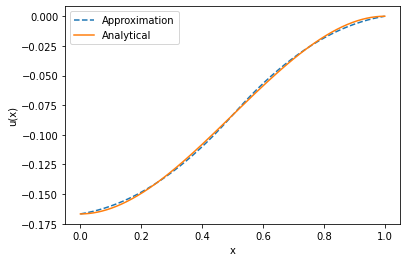

In [32]:
Ne = 2
f = "2*x-1"
analytical = "0.5*x*x -1/3*x**3 + C*x - C + D - 1/6"

C = 0
D = 0

my_solver = P2_FEM(Ne, f, C, D, analytical)
my_solver.SolveLinearSystem()
my_solver.PlotSolution()

To study the $L_2$ norm the following combinations of $(C,D)$ values were run: $ (1,1), (1,2), (2,1), (2,2)$ for $N_e = [1,2,3,....,30]$.

6.636481088096373
3.4300486956313576
2.2320593768085657
1.4076939540203584
1.233868754327359
1.2397442122160969
1.275305952126064
1.30994595977281
1.3386416767321605
1.361616698605856
1.379977708581893
1.3947727113428992
1.4068298984519845
1.416773100003066
1.425067118655053
1.4320596852931493
1.4380129754921402
1.4431270105781349
1.447555942266196
1.4514201785767438
1.4548147624697667
1.457815298695925
1.4604823858407514
1.4628659783683038
1.465006251571808
1.4669366598789315
1.4686847570829444
1.4702742324675555
1.471724594454001


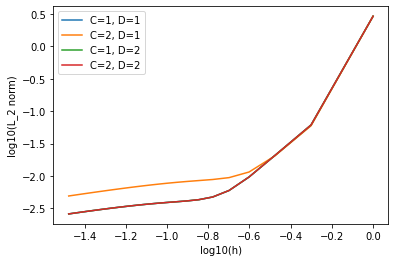

In [18]:
L2_1_1 = np.load("../datafiles/L2_C_1_D_1.npy")
L2_1_2 = np.load("../datafiles/L2_C_1_D_2.npy")
L2_2_1 = np.load("../datafiles/L2_C_2_D_1.npy")
L2_2_2 = np.load("../datafiles/L2_C_2_D_2.npy")


L2_3_2 = np.load("../codes/L2_C_3_D_2.npy")


for i in range(29):
    r = np.log10(L2_3_2[1][i+1]/L2_3_2[1][i])/np.log10(L2_3_2[0][i+1]/L2_3_2[0][i])
    print(r)


    
plt.plot(np.log10(L2_1_1[0]), np.log10(L2_1_1[1]), label="C=1, D=1")
plt.plot(np.log10(L2_2_1[0]), np.log10(L2_2_1[1]), label="C=2, D=1")
plt.plot(np.log10(L2_1_2[0]), np.log10(L2_1_2[1]), label="C=1, D=2")
plt.plot(np.log10(L2_1_2[0]), np.log10(L2_1_2[1]), label="C=2, D=2")
plt.legend()
plt.xlabel("log10(h)"); plt.ylabel("log10(L_2 norm)")
plt.show()

As we can see the $L_2$ norm is decreasing for increasing step sizes for all combinations of $(C,D)$. The lowest $L_2$ norm is obtained for $(C,D)=(2,2)$.